In [1]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kaggle
!kaggle datasets download ankitbansal06/retail-orders 

Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0
retail-orders.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import os, zipfile
zip_file_path = 'retail-orders.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

print("Extracted: ", os.listdir())

Extracted:  ['SQL for Data Analysis Advanced Techniques for Transforming Data into Insights (Cathy Tanimura) (Z-Library).pdf', 'orders.csv', 'PythonSql.ipynb', 'retail-orders.zip', 'Readme.md', 'PFymNGYQQ5Cf1XbjyxwNOg_fe8a91120d2244988c658b5a363087f1_Advanced-Data-Analytics-Certificate-glossary.docx']


In [4]:
import pandas as pd
df = pd.read_csv("orders.csv")
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [5]:
# 
orders_cleaned = df.copy()

In [6]:
orders_cleaned.columns = orders_cleaned.columns.str.lower().str.replace(" ", "_")
orders_cleaned.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent'],
      dtype='object')

In [7]:
orders_cleaned.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [8]:
# New Column:  discount amount
orders_cleaned['discount'] = orders_cleaned['list_price'] * orders_cleaned['discount_percent'] * .01

# New Column: Final price after discount
orders_cleaned['sale_price'] = orders_cleaned['list_price'] - orders_cleaned['discount']

# New Column: Profit
orders_cleaned['profit'] = orders_cleaned['sale_price'] - orders_cleaned['cost_price']

# Columns to drop
orders_cleaned.drop(columns=['cost_price', 'discount_percent', 'list_price'], inplace=True)

In [9]:
orders_cleaned.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0


In [10]:
orders_cleaned.dtypes

order_id          int64
order_date       object
ship_mode        object
segment          object
country          object
city             object
state            object
postal_code       int64
region           object
category         object
sub_category     object
product_id       object
quantity          int64
discount        float64
sale_price      float64
profit          float64
dtype: object

In [11]:
# Convert Order Date from object to datetime
orders_cleaned['order_date'] = pd.to_datetime(orders_cleaned['order_date'], format='%Y-%m-%d')

# Convert Postal Code from int to String
orders_cleaned['postal_code'] = orders_cleaned['postal_code'].astype(str)

orders_cleaned.dtypes

order_id                 int64
order_date      datetime64[ns]
ship_mode               object
segment                 object
country                 object
city                    object
state                   object
postal_code             object
region                  object
category                object
sub_category            object
product_id              object
quantity                 int64
discount               float64
sale_price             float64
profit                 float64
dtype: object

Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
orders_cleaned['year'] = orders_cleaned['order_date'].dt.year
orders_cleaned['month'] = orders_cleaned['order_date'].dt.month
orders_cleaned.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit,year,month
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8,2023,3
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1,2023,8
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5,2023,1
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8,2022,6
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0,2022,7


In [14]:
# Group by year and month and sum the sale_price for each group to have the total sales per year per month
monthly_sales = orders_cleaned.groupby(['year', 'month'])['sale_price'].sum().unstack(level=0).fillna(0)
monthly_sales.head()

year,2022,2023
month,,
1,94712.5,88632.6
2,90091.0,128124.2
3,80106.0,82512.3
4,95451.6,111568.6
5,79448.3,86447.9


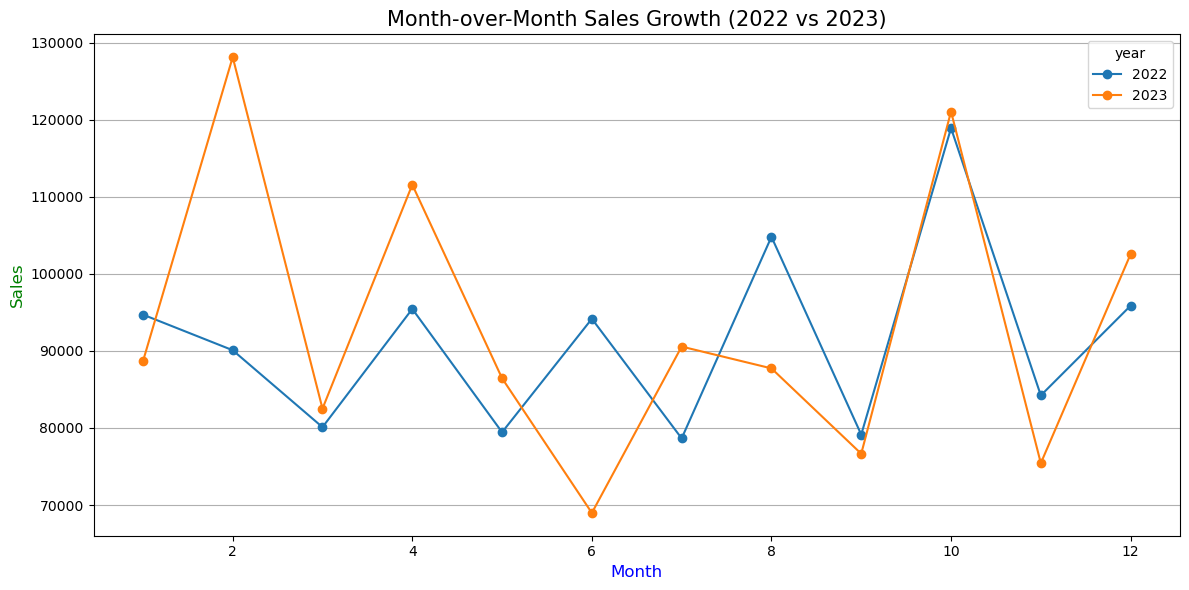

In [15]:
monthly_sales.plot(kind='line',figsize=(12, 6), marker='o')
plt.title('Month-over-Month Sales Growth (2022 vs 2023)', fontsize=15)
plt.xlabel('Month', fontsize=12, c='b')
plt.ylabel('Sales', fontsize=12, c='g')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [16]:
# Monthly highest sales per category
orders_cleaned.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit,year,month
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8,2023,3
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1,2023,8
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5,2023,1
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8,2022,6
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0,2022,7


In [17]:
monthly_sales_per_category = (
    orders_cleaned.groupby(['category', 'month'])['sale_price']
    .sum()
    .reset_index()
    .sort_values(['category', 'sale_price'], ascending=[True, False])
    .groupby('category')
    .head(1)
    )

monthly_sales_per_category.head()

,category,month,sale_price
7,Furniture,8,71649.5
13,Office Supplies,2,77959.5
33,Technology,10,103021.1


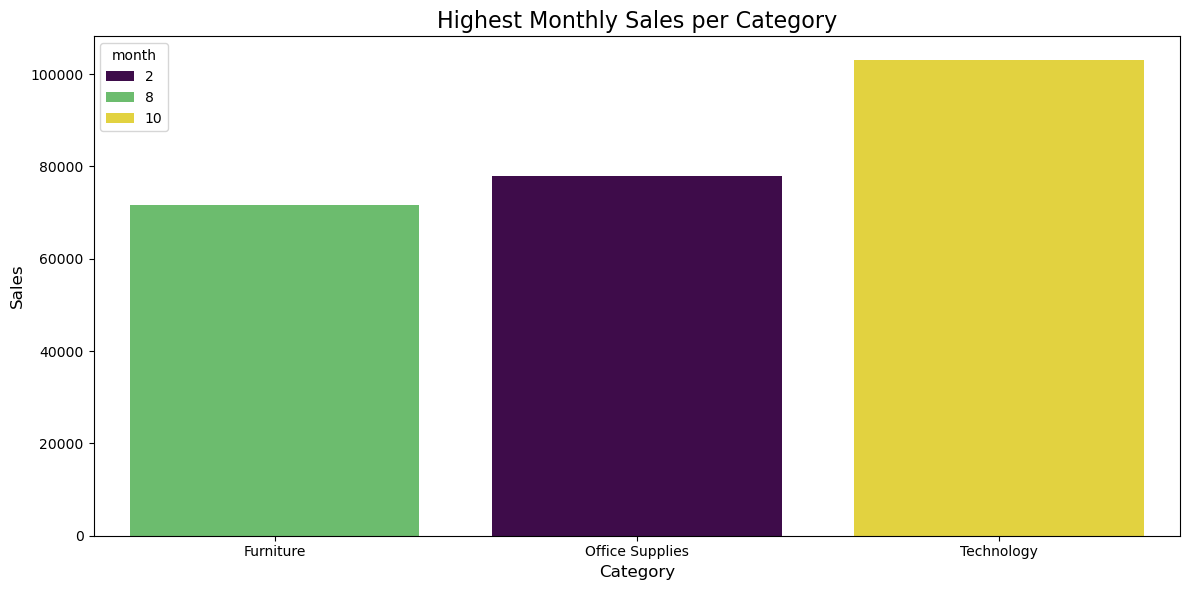

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales_per_category, x='category', y='sale_price', hue='month', palette='viridis')
plt.title('Highest Monthly Sales per Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.tight_layout()
plt.show()

In [19]:
# Category-wise Performance

# Group by category and calculate sales and profit
category_performance = orders_cleaned.groupby('category')[['sale_price', 'profit']].sum().sort_values('sale_price', ascending=False).fillna(0)
category_performance.head()


,sale_price,profit
category,,
Technology,806873.5,76433.5
Furniture,715340.7,66480.7
Office Supplies,693644.5,62254.5


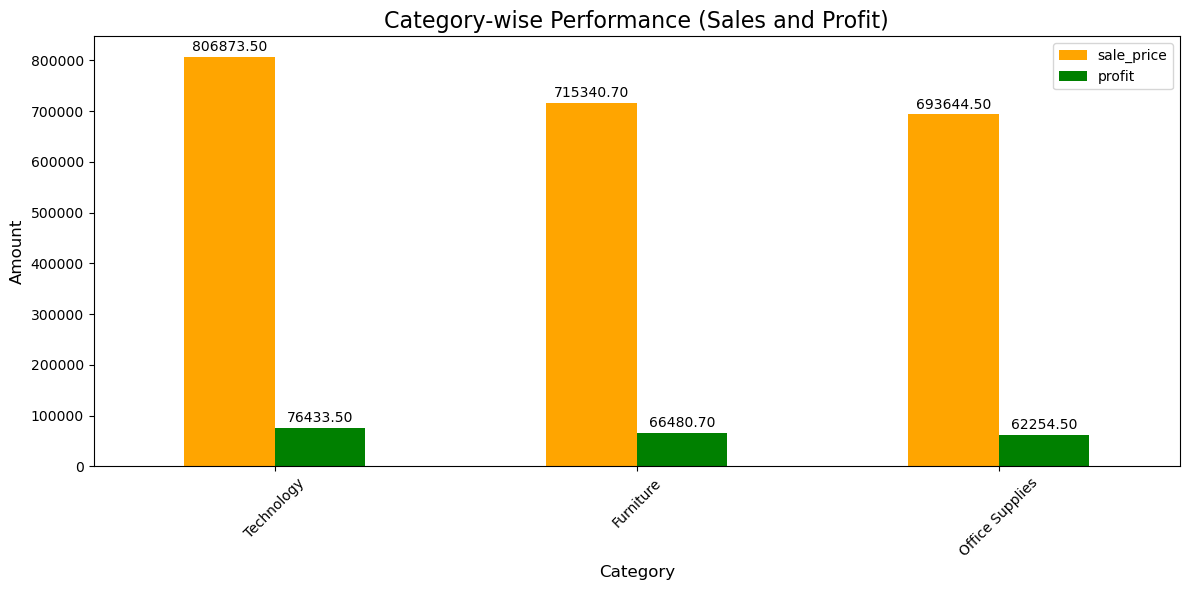

In [20]:
ax = category_performance.plot(kind='bar', figsize=(12, 6), color=['orange', 'green'])
plt.title('Category-wise Performance (Sales and Profit)', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Amount', fontsize=12)
plt.tight_layout()

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=2)

plt.show()


In [21]:
#Regional Profitability
regional_profit = (
    orders_cleaned.groupby('region')['profit']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

regional_profit


,region,profit
0,West,62558.6
1,East,58220.0
2,Central,46378.6
3,South,38011.5


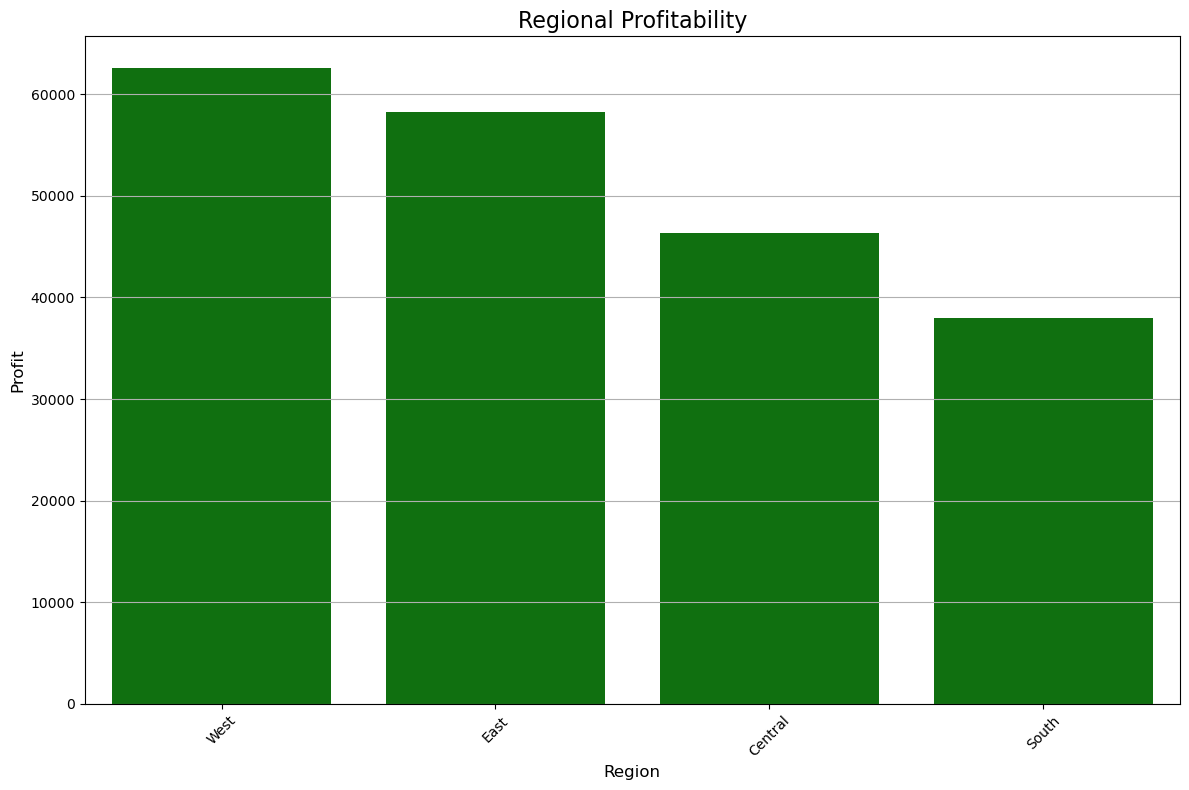

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(data=regional_profit, x='region', y='profit', color='green')
plt.title('Regional Profitability', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [23]:
# Sales distribution by region
region_sales = orders_cleaned.groupby('region')['sale_price'].sum()
region_sales

region
Central    483668.6
East       654320.0
South      378011.5
West       699858.6
Name: sale_price, dtype: float64

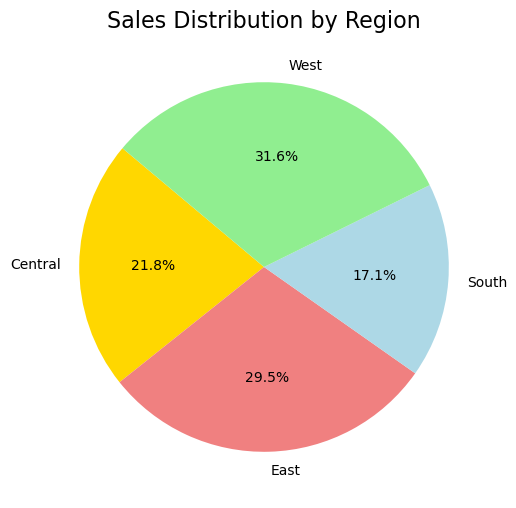

In [24]:
region_sales.plot(
    kind='pie', 
    figsize=(6, 6), 
    autopct='%1.1f%%',
    startangle=140,
    colors=['gold', 'lightcoral', 'lightblue', 'lightgreen']
    )

plt.title('Sales Distribution by Region', fontsize=16)
plt.ylabel('')
plt.show()

In [39]:
# Shipping Mode Analysis - what is the most used shipping mode ?
shipping_mode_counts = (
    orders_cleaned.groupby('ship_mode')['order_id']
    .count()
    .sort_values(ascending=False)
)

# Delete the categories with 0 count
shipping_mode_counts = shipping_mode_counts[
    ~shipping_mode_counts.index.isin(['Not Available', 'unknown'])
]

shipping_mode_counts

ship_mode
Standard Class    5962
Second Class      1945
First Class       1538
Same Day           543
Name: order_id, dtype: int64

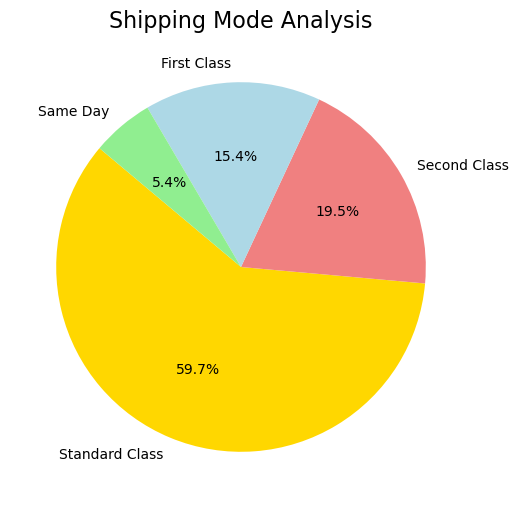

In [43]:
shipping_mode_counts.plot(
    kind='pie', 
    figsize=(6, 6), 
    autopct='%1.1f%%',
    startangle=140,
    colors=['gold', 'lightcoral', 'lightblue', 'lightgreen']
)
plt.title('Shipping Mode Analysis', fontsize=16)
plt.ylabel('')
plt.show()

In [49]:
# Shipping Mode Analysis - Sales and Profit
shipping_analysis = (
    orders_cleaned.groupby('ship_mode')[['sale_price', 'profit']].sum().sort_values('sale_price', ascending=False)
)

shipping_analysis = shipping_analysis[
    ~shipping_analysis.index.isin(['Not Available', 'unknown'])
]
shipping_analysis

,sale_price,profit
ship_mode,,
Standard Class,1307065.1,122005.1
Second Class,442976.1,41386.1
First Class,339242.3,30452.3
Same Day,123747.2,10987.2


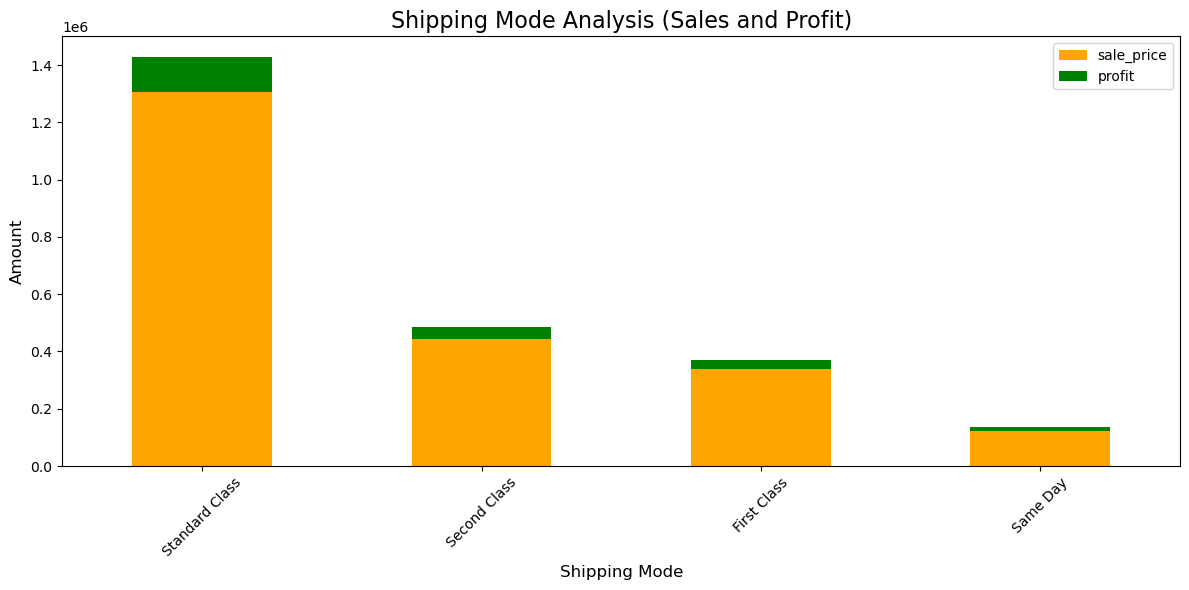

In [50]:
shipping_analysis.plot(
    kind='bar', 
    stacked=True,
    figsize=(12, 6), 
    color=['orange', 'green']
)
plt.title('Shipping Mode Analysis (Sales and Profit)', fontsize=16)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# Revenue by category and sub-category
category_subcategory = (
    orders_cleaned.pivot_table(
        values='sale_price',
        index='category',
        columns='sub_category',
        aggfunc='sum',
    )
)
'''
    category_subcategory = (
    orders_cleaned.groupby(['sub_category', 'category'])['sale_price']
    .sum()
    .unstack(level=0)
    .fillna(0)
)
'''
category_subcategory


sub_category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
category,,,,,,,,,,,,,,,,,
Furniture,NaN,NaN,NaN,NaN,110816.1,316825.1,NaN,NaN,NaN,88338.3,NaN,NaN,NaN,NaN,NaN,NaN,199361.2
Office Supplies,NaN,103697.7,26259.8,196038.6,NaN,NaN,NaN,15917.2,2938.9,NaN,11994.9,NaN,75831.3,NaN,215908.0,45058.1,NaN
Technology,161604.6,NaN,NaN,NaN,NaN,NaN,144358.9,NaN,NaN,NaN,NaN,182901.7,NaN,318008.3,NaN,NaN,NaN


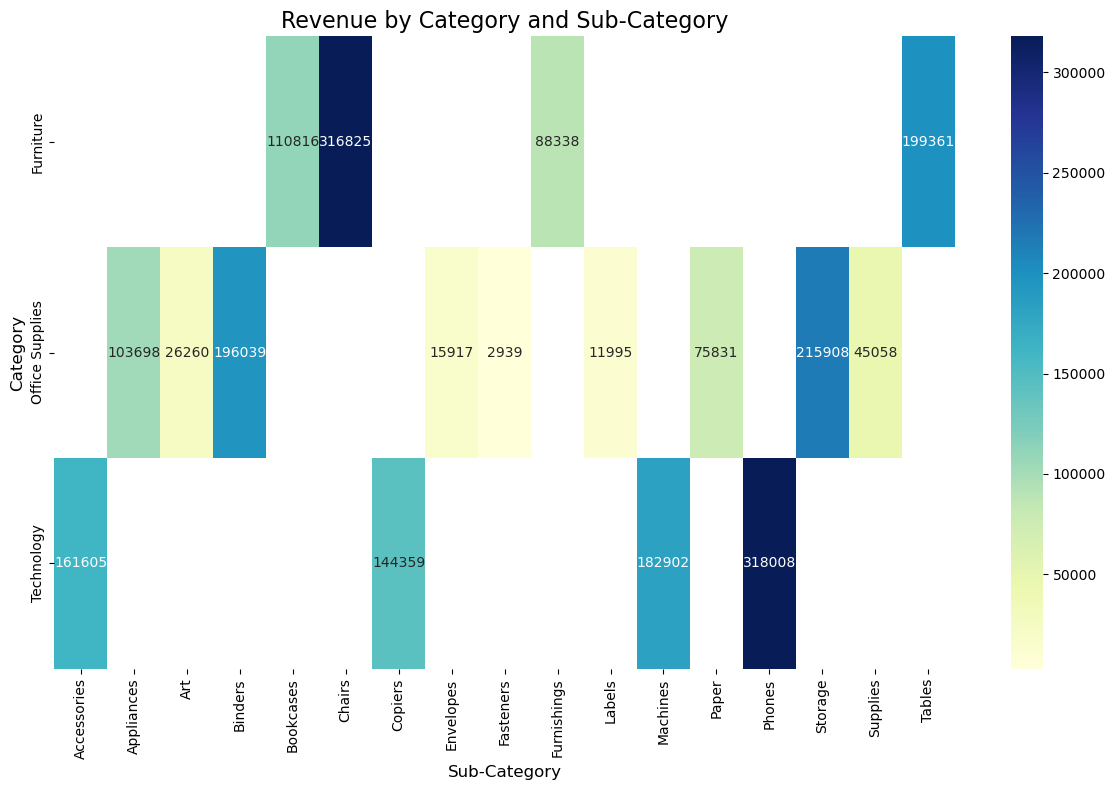

In [64]:

plt.figure(figsize=(12,8))
sns.heatmap(category_subcategory, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Revenue by Category and Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()


Top Cities by Sales

In [66]:
orders_cleaned.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit,year,month
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8,2023,3
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1,2023,8
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5,2023,1
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8,2022,6
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0,2022,7


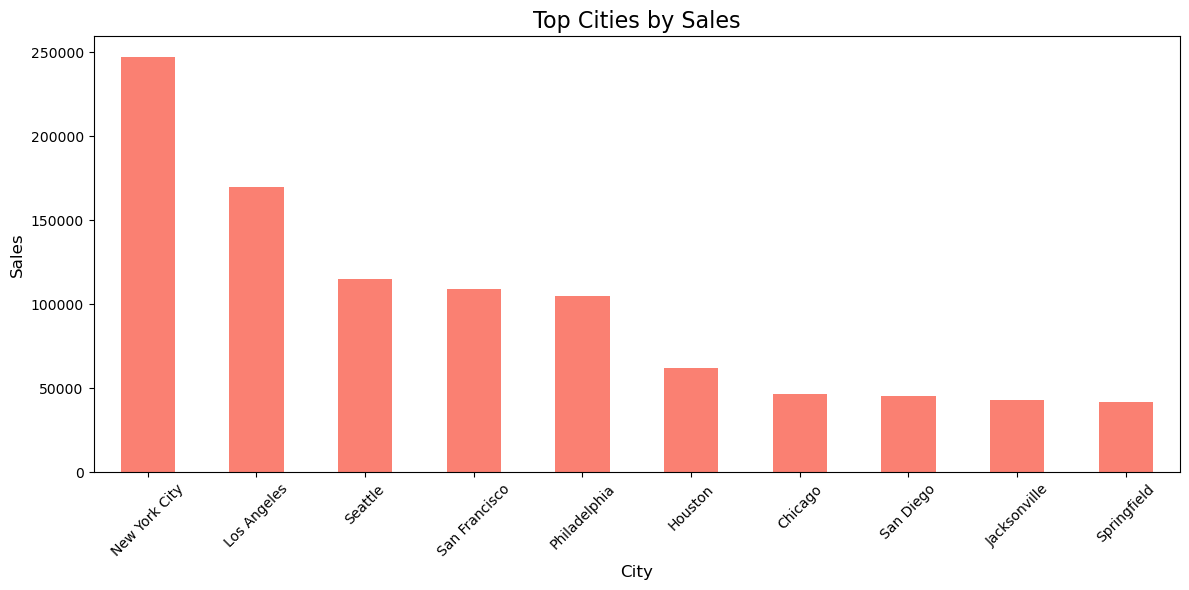

In [73]:
top_cities = orders_cleaned.groupby('city')['sale_price'].sum().nlargest(10)
top_cities.plot(
    kind='bar',
    figsize=(12, 6),
    color='salmon'
)
plt.title('Top Cities by Sales', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

